In [1]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup
import xmltodict, json
import matplotlib.pyplot as plt

In [2]:
url = 'http://nsdp.gso.gov.vn/GSO-chung/SDMXFiles/GSO/GSO.%20Chi%20so%20cong%20nghiep.IIP_Vietnam.xml'
# read xml file from url 
r = requests.get(url)
soup = BeautifulSoup(r.text, 'xml')
# convert xml to python dict
data = xmltodict.parse(str(soup))
data

{'message:StructureSpecificData': {'@xmlns:common': 'http://www.sdmx.org/resources/sdmxml/schemas/v2_1/common',
  '@xmlns:footer': 'http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message/footer',
  '@xmlns:message': 'http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message',
  '@xmlns:ns1': 'urn:sdmx:org.sdmx.infomodel.datastructure.DataStructure=IMF:ECOFIN_DSD(1.0):ObsLevelDim:TIME_PERIOD',
  '@xmlns:ss': 'http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/structurespecific',
  '@xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance',
  '@xsi:schemaLocation': 'http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message https://registry.sdmx.org/schemas/v2_1/SDMXMessage.xsd urn:sdmx:org.sdmx.infomodel.datastructure.DataStructure=IMF:ECOFIN_DSD(1.0):ObsLevelDim:TIME_PERIOD https://sdmxcentral.imf.org/ws/public/sdmxapi/rest/schema/datastructure/IMF/ECOFIN_DSD/1.0?format=sdmx-2.1',
  'message:Header': {'message:ID': 'DS1654054551323',
   'message:Test': 'false',
   'message:Prepare

In [7]:
structure = {0: {'AIP_ISIC4_IX':'Industry (2015=100)'}, 1:{'AIP_ISIC4_B_IX':'Mining and Quarying (2015=100)'}, 2:{'AIP_ISIC4_C_IX':'Manufacturing (2015=100)'}, 3:{'AIP_ISIC4_D_IX':'Electricity, Gas (2015=100)'}, 4:{'AIP_ISIC4_E_IX':'Water Supply: Sewerage, Waste Mgt/Remediation Activities(2015=100)'}}
data_series = data['message:StructureSpecificData']['message:DataSet']['Series']
df_industry = data_series[0]
df_mining = data_series[1]
df_manufacturing = data_series[2]
df_electricity = data_series[3]
df_water = data_series[4]
df_industry

{'@BASE_PER': '2015',
 '@COUNTERPART_AREA': '_Z',
 '@DATA_DOMAIN': 'IND',
 '@FREQ': 'M',
 '@INDICATOR': 'AIP_ISIC4_IX',
 '@REF_AREA': 'VN',
 '@UNIT_MULT': '0',
 'Obs': [{'@OBS_VALUE': '96.8', '@TIME_PERIOD': '2017-01'},
  {'@OBS_VALUE': '96.26', '@TIME_PERIOD': '2017-02'},
  {'@OBS_VALUE': '114.49', '@TIME_PERIOD': '2017-03'},
  {'@OBS_VALUE': '118.14', '@TIME_PERIOD': '2017-04'},
  {'@OBS_VALUE': '117.49', '@TIME_PERIOD': '2017-05'},
  {'@OBS_VALUE': '112.95', '@TIME_PERIOD': '2017-06'},
  {'@OBS_VALUE': '113.89', '@TIME_PERIOD': '2017-07'},
  {'@OBS_VALUE': '122.31', '@TIME_PERIOD': '2017-08'},
  {'@OBS_VALUE': '126.63', '@TIME_PERIOD': '2017-09'},
  {'@OBS_VALUE': '128.76', '@TIME_PERIOD': '2017-10'},
  {'@OBS_VALUE': '129.21', '@TIME_PERIOD': '2017-11'},
  {'@OBS_VALUE': '131.75', '@TIME_PERIOD': '2017-12'},
  {'@OBS_VALUE': '126.8', '@TIME_PERIOD': '2018-01'},
  {'@OBS_VALUE': '101.72', '@TIME_PERIOD': '2018-02'},
  {'@OBS_VALUE': '126.79', '@TIME_PERIOD': '2018-03'},
  {'@OBS_VAL

In [9]:
def get_industry_data(dataframe):
   x_dict = []
   y_dict = []
   for i in range(0,len(dataframe['Obs'])):
      x = dataframe['Obs'][i]['@TIME_PERIOD'] 
      y = dataframe['Obs'][i]['@OBS_VALUE']
      x = pd.to_datetime(x).strftime('%Y-%m') #convert x to datetime
      x_dict.append(x)
      y_dict.append(float(y)) #convert y to float
   return x_dict, y_dict

x, y = get_industry_data(df_industry)
print(f'time: {x}, \n value: {y}')

time: ['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05'], 
 value: [96.8, 96.26, 114.49, 118.14, 117.49, 112.95, 113.89, 122.31, 126.63, 128.76, 129.21, 131.75, 126.8, 101.72, 126.79, 125.04, 128.72, 127.27, 129.62, 135.35, 134.43, 139.41, 143.13, 145.09, 134.05, 108.37, 134.77, 134.56, 138.69, 134.1, 141.57, 149.27, 148.62, 152.9, 1

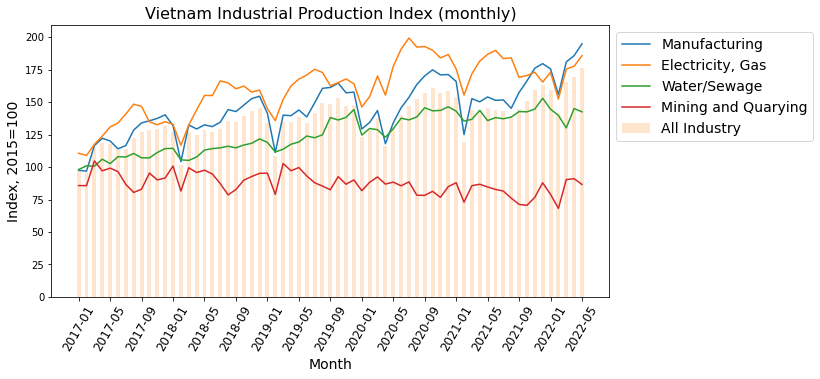

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
fontsize = 14
# plot data
# barplot for industry 
plt.bar(get_industry_data(df_industry)[0], get_industry_data(df_industry)[1], color='#ff7f0e', width=0.5, label='All Industry', alpha=0.2)
#plt.plot(get_industry_data(df_industry)[0], get_industry_data(df_industry)[1], label='All Industry', ls='-', marker='o', color='blue')
plt.plot(get_industry_data(df_manufacturing)[0], get_industry_data(df_manufacturing)[1], label='Manufacturing')
plt.plot(get_industry_data(df_electricity)[0], get_industry_data(df_electricity)[1], label='Electricity, Gas')
plt.plot(get_industry_data(df_water)[0], get_industry_data(df_water)[1], label='Water/Sewage')
plt.plot(get_industry_data(df_mining)[0], get_industry_data(df_mining)[1], label='Mining and Quarying')
#legend outside 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fontsize=fontsize)
#set x-ticks every 3 months 
ax.xaxis.set_major_locator(plt.MultipleLocator(4))
plt.xlabel('Month', fontsize=fontsize)
plt.xticks(rotation=60, fontsize=12)
plt.ylabel('Index, 2015=100', fontsize=fontsize)
plt.title('Vietnam Industrial Production Index (monthly)', fontsize=16)
plt.savefig('industry_production_index.png', dpi=300, bbox_inches='tight')

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio
# ======== gif for iip ======================
filenames = []
x = get_industry_data(df_industry)[0]
for i in range(0, len(x)):
    fig, ax = plt.subplots(figsize=(10,5))
    fontsize = 14
    # plot data
    plt.bar(get_industry_data(df_industry)[0][:i], get_industry_data(df_industry)[1][:i], color='#ff7f0e', width=0.5, label='All Industry', alpha=0.2)
    #plt.plot(get_industry_data(df_industry)[0][:i], get_industry_data(df_industry)[1][:i], label='All Industry', ls='-', marker='o', color='blue')
    plt.plot(get_industry_data(df_manufacturing)[0][:i], get_industry_data(df_manufacturing)[1][:i], label='Manufacturing')
    plt.plot(get_industry_data(df_electricity)[0][:i], get_industry_data(df_electricity)[1][:i], label='Electricity, Gas')
    plt.plot(get_industry_data(df_water)[0][:i], get_industry_data(df_water)[1][:i], label='Water/Sewage')
    plt.plot(get_industry_data(df_mining)[0][:i], get_industry_data(df_mining)[1][:i], label='Mining and Quarying')
    #legend outside 
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fontsize=fontsize)
    #set x-ticks every 3 months 
    ax.xaxis.set_major_locator(plt.MultipleLocator(4))
    plt.xlabel('Month', fontsize=fontsize)
    plt.xticks(rotation=45, fontsize=10)
    plt.ylabel('Index, 2015=100', fontsize=fontsize)
    plt.title('Vietnam Industrial Production Index (monthly)', fontsize=16)
    
    # create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()
# build gif

gif_filename = 'iip.gif'
images = []

for filename in filenames:
    images.append(imageio.imread(filename))
duration = 0.15
imageio.mimsave(gif_filename, images, duration=duration, loop=1)
       
# Remove files
for filename in set(filenames):
    os.remove(filename)